In [94]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

In [96]:
df = pd.read_csv('음주운전교통사고비율_시도_시_군_구__20250529094107.csv')
df

,행정구역별(1),2010,2010.1,2011,2011.1,2012,2012.1,2013,2013.1,2014,...,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
0,행정구역별(1),음주운전 교통사고발생건수<br>(A) (건),교통사고 발생건수<br>(B) (건),음주운전 교통사고발생건수<br>(A) (건),교통사고 발생건수<br>(B) (건),음주운전 교통사고발생건수<br>(A) (건),교통사고 발생건수<br>(B) (건),음주운전 교통사고발생건수<br>(A) (건),교통사고 발생건수<br>(B) (건),음주운전 교통사고발생건수<br>(A) (건),...,음주운전 교통사고발생건수<br>(A) (건),교통사고 발생건수<br>(B) (건),음주운전 교통사고발생건수<br>(A) (건),교통사고 발생건수<br>(B) (건),음주운전 교통사고발생건수<br>(A) (건),교통사고 발생건수<br>(B) (건),음주운전 교통사고발생건수<br>(A) (건),교통사고 발생건수<br>(B) (건),음주운전 교통사고발생건수<br>(A) (건),교통사고 발생건수<br>(B) (건)
1,전국,28641,226878,28461,221711,29093,223656,26589,215354,24043,...,15708,229600,17247,209654,14894,203130,15059,196836,13042,198296
2,서울특별시,3910,41662,3700,40451,3819,40829,3550,39439,3361,...,2190,39258,2327,35227,2059,33913,2348,33698,1938,33811
3,부산광역시,1169,13847,1155,13893,1226,14733,1166,12606,996,...,636,12992,742,11913,637,11339,648,10882,590,11003
4,대구광역시,1510,14600,1417,14679,1395,14422,1281,13680,1219,...,702,14536,765,12940,658,12133,652,11102,573,10929
5,인천광역시,1439,10305,1562,10096,1499,9757,1331,8990,1180,...,770,8698,879,8505,771,7912,851,7695,677,7648
6,광주광역시,1167,8894,1104,8328,1207,8600,1058,8036,913,...,549,8169,609,7718,537,7543,447,7122,379,6972
7,대전광역시,792,5870,849,6062,930,5631,931,5462,751,...,472,8337,519,7215,420,7027,423,6841,343,7398
8,울산광역시,744,5067,839,4913,900,4950,871,5022,874,...,373,4347,433,3834,348,3801,316,3660,240,3664
9,세종특별자치시,-,-,-,-,50,218,78,445,81,...,89,922,72,813,72,788,76,932,80,1166


- 2010 : 음주운전 교통사고 발생 건수
- 2010.1 : 교통사고 발생 건수

- 세종시의 경우 2012-07-01일 출범하였기 때문에 결측값을

In [99]:
df.iloc[1:]

,행정구역별(1),2010,2010.1,2011,2011.1,2012,2012.1,2013,2013.1,2014,...,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
1,전국,28641,226878,28461,221711,29093,223656,26589,215354,24043,...,15708,229600,17247,209654,14894,203130,15059,196836,13042,198296
2,서울특별시,3910,41662,3700,40451,3819,40829,3550,39439,3361,...,2190,39258,2327,35227,2059,33913,2348,33698,1938,33811
3,부산광역시,1169,13847,1155,13893,1226,14733,1166,12606,996,...,636,12992,742,11913,637,11339,648,10882,590,11003
4,대구광역시,1510,14600,1417,14679,1395,14422,1281,13680,1219,...,702,14536,765,12940,658,12133,652,11102,573,10929
5,인천광역시,1439,10305,1562,10096,1499,9757,1331,8990,1180,...,770,8698,879,8505,771,7912,851,7695,677,7648
6,광주광역시,1167,8894,1104,8328,1207,8600,1058,8036,913,...,549,8169,609,7718,537,7543,447,7122,379,6972
7,대전광역시,792,5870,849,6062,930,5631,931,5462,751,...,472,8337,519,7215,420,7027,423,6841,343,7398
8,울산광역시,744,5067,839,4913,900,4950,871,5022,874,...,373,4347,433,3834,348,3801,316,3660,240,3664
9,세종특별자치시,-,-,-,-,50,218,78,445,81,...,89,922,72,813,72,788,76,932,80,1166
10,경기도,7163,43963,7120,43655,7180,44763,6543,43900,5765,...,4140,55463,4495,52391,4003,53332,4205,52968,3688,53164


In [101]:
df = df.iloc[1:].reset_index(drop = True)

In [103]:
df

,행정구역별(1),2010,2010.1,2011,2011.1,2012,2012.1,2013,2013.1,2014,...,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
0,전국,28641,226878,28461,221711,29093,223656,26589,215354,24043,...,15708,229600,17247,209654,14894,203130,15059,196836,13042,198296
1,서울특별시,3910,41662,3700,40451,3819,40829,3550,39439,3361,...,2190,39258,2327,35227,2059,33913,2348,33698,1938,33811
2,부산광역시,1169,13847,1155,13893,1226,14733,1166,12606,996,...,636,12992,742,11913,637,11339,648,10882,590,11003
3,대구광역시,1510,14600,1417,14679,1395,14422,1281,13680,1219,...,702,14536,765,12940,658,12133,652,11102,573,10929
4,인천광역시,1439,10305,1562,10096,1499,9757,1331,8990,1180,...,770,8698,879,8505,771,7912,851,7695,677,7648
5,광주광역시,1167,8894,1104,8328,1207,8600,1058,8036,913,...,549,8169,609,7718,537,7543,447,7122,379,6972
6,대전광역시,792,5870,849,6062,930,5631,931,5462,751,...,472,8337,519,7215,420,7027,423,6841,343,7398
7,울산광역시,744,5067,839,4913,900,4950,871,5022,874,...,373,4347,433,3834,348,3801,316,3660,240,3664
8,세종특별자치시,-,-,-,-,50,218,78,445,81,...,89,922,72,813,72,788,76,932,80,1166
9,경기도,7163,43963,7120,43655,7180,44763,6543,43900,5765,...,4140,55463,4495,52391,4003,53332,4205,52968,3688,53164


In [105]:
df.loc[8,'2010'] = 0
df.loc[8,'2011'] = 0
df.loc[8,'2010.1'] = 0
df.loc[8,'2011.1'] = 0

In [107]:
df

,행정구역별(1),2010,2010.1,2011,2011.1,2012,2012.1,2013,2013.1,2014,...,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
0,전국,28641,226878,28461,221711,29093,223656,26589,215354,24043,...,15708,229600,17247,209654,14894,203130,15059,196836,13042,198296
1,서울특별시,3910,41662,3700,40451,3819,40829,3550,39439,3361,...,2190,39258,2327,35227,2059,33913,2348,33698,1938,33811
2,부산광역시,1169,13847,1155,13893,1226,14733,1166,12606,996,...,636,12992,742,11913,637,11339,648,10882,590,11003
3,대구광역시,1510,14600,1417,14679,1395,14422,1281,13680,1219,...,702,14536,765,12940,658,12133,652,11102,573,10929
4,인천광역시,1439,10305,1562,10096,1499,9757,1331,8990,1180,...,770,8698,879,8505,771,7912,851,7695,677,7648
5,광주광역시,1167,8894,1104,8328,1207,8600,1058,8036,913,...,549,8169,609,7718,537,7543,447,7122,379,6972
6,대전광역시,792,5870,849,6062,930,5631,931,5462,751,...,472,8337,519,7215,420,7027,423,6841,343,7398
7,울산광역시,744,5067,839,4913,900,4950,871,5022,874,...,373,4347,433,3834,348,3801,316,3660,240,3664
8,세종특별자치시,0,0,0,0,50,218,78,445,81,...,89,922,72,813,72,788,76,932,80,1166
9,경기도,7163,43963,7120,43655,7180,44763,6543,43900,5765,...,4140,55463,4495,52391,4003,53332,4205,52968,3688,53164


In [109]:
df.columns

Index(['행정구역별(1)', '2010', '2010.1', '2011', '2011.1', '2012', '2012.1',
       '2013', '2013.1', '2014', '2014.1', '2015', '2015.1', '2016', '2016.1',
       '2017', '2017.1', '2018', '2018.1', '2019', '2019.1', '2020', '2020.1',
       '2021', '2021.1', '2022', '2022.1', '2023', '2023.1'],
      dtype='object')

In [111]:
df_alc = df[['행정구역별(1)', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']]

In [121]:
df_alc = df_alc.melt(id_vars = '행정구역별(1)')

In [125]:
df_alc.columns = ['행정구역별', '년도', '음주운전사고수']

In [127]:
df_alc

,행정구역별,년도,음주운전사고수
0,전국,2010,28641
1,서울특별시,2010,3910
2,부산광역시,2010,1169
3,대구광역시,2010,1510
4,인천광역시,2010,1439
...,...,...,...
247,전북특별자치도,2023,436
248,전라남도,2023,523
249,경상북도,2023,692
250,경상남도,2023,784


In [163]:
df_com = df[['행정구역별(1)', '2010.1', '2011.1', '2012.1', '2013.1', '2014.1', '2015.1', '2016.1', '2017.1', '2018.1',
             '2019.1', '2020.1', '2021.1', '2022.1', '2023.1']]

In [165]:
df_com

,행정구역별(1),2010.1,2011.1,2012.1,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1,2022.1,2023.1
0,전국,226878,221711,223656,215354,223552,232035,220917,216335,217148,229600,209654,203130,196836,198296
1,서울특별시,41662,40451,40829,39439,40792,41665,40039,38625,38795,39258,35227,33913,33698,33811
2,부산광역시,13847,13893,14733,12606,12693,12757,12192,11753,11937,12992,11913,11339,10882,11003
3,대구광역시,14600,14679,14422,13680,14519,14228,13098,12970,13199,14536,12940,12133,11102,10929
4,인천광역시,10305,10096,9757,8990,8846,8727,8535,7719,7632,8698,8505,7912,7695,7648
5,광주광역시,8894,8328,8600,8036,8194,7864,7354,7499,7459,8169,7718,7543,7122,6972
6,대전광역시,5870,6062,5631,5462,5899,6901,7535,7767,7554,8337,7215,7027,6841,7398
7,울산광역시,5067,4913,4950,5022,5180,5368,4496,4265,3992,4347,3834,3801,3660,3664
8,세종특별자치시,0,0,218,445,482,536,521,746,795,922,813,788,932,1166
9,경기도,43963,43655,44763,43900,48112,52954,51013,50627,53448,55463,52391,53332,52968,53164


In [167]:
df_com = df_com.melt(id_vars = '행정구역별(1)')
df_com.columns = ['행정구역별', '년도', '전체교통사고수']


In [169]:
df_com['년도'] = df_com['년도'].astype('float')
df_com

,행정구역별,년도,전체교통사고수
0,전국,2010.1,226878
1,서울특별시,2010.1,41662
2,부산광역시,2010.1,13847
3,대구광역시,2010.1,14600
4,인천광역시,2010.1,10305
...,...,...,...
247,전북특별자치도,2023.1,5830
248,전라남도,2023.1,8287
249,경상북도,2023.1,10728
250,경상남도,2023.1,11122


In [171]:
df_com['년도'] = df_com['년도'].astype('int')

In [173]:
df_com

,행정구역별,년도,전체교통사고수
0,전국,2010,226878
1,서울특별시,2010,41662
2,부산광역시,2010,13847
3,대구광역시,2010,14600
4,인천광역시,2010,10305
...,...,...,...
247,전북특별자치도,2023,5830
248,전라남도,2023,8287
249,경상북도,2023,10728
250,경상남도,2023,11122


In [175]:
df_f = df_alc.copy()

In [177]:
df_f['전체교통사고수'] = df_com['전체교통사고수']

In [179]:
df_f

,행정구역별,년도,음주운전사고수,전체교통사고수
0,전국,2010,28641,226878
1,서울특별시,2010,3910,41662
2,부산광역시,2010,1169,13847
3,대구광역시,2010,1510,14600
4,인천광역시,2010,1439,10305
...,...,...,...,...
247,전북특별자치도,2023,436,5830
248,전라남도,2023,523,8287
249,경상북도,2023,692,10728
250,경상남도,2023,784,11122


In [189]:
# df_f['교통사고중음주운전이차지하는비율'] = df_f['음주운전사고수'] / df_f['전체교통사고수']
df_f['년도'] = df_f['년도'].astype('int')
df_f['음주운전사고수'] = df_f['음주운전사고수'].astype('int')
df_f['전체교통사고수'] = df_f['전체교통사고수'].astype('int')

In [193]:
df_f['음주운전사고율'] = df_f['음주운전사고수'] / df_f['전체교통사고수']

In [195]:
df_f

,행정구역별,년도,음주운전사고수,전체교통사고수,음주운전사고율
0,전국,2010,28641,226878,0.126240
1,서울특별시,2010,3910,41662,0.093851
2,부산광역시,2010,1169,13847,0.084423
3,대구광역시,2010,1510,14600,0.103425
4,인천광역시,2010,1439,10305,0.139641
...,...,...,...,...,...
247,전북특별자치도,2023,436,5830,0.074786
248,전라남도,2023,523,8287,0.063111
249,경상북도,2023,692,10728,0.064504
250,경상남도,2023,784,11122,0.070491


In [272]:
# 시간대별 음주운전 사고 발생 건 수 및 비율
df_time = pd.read_excel('data/시간대별 음주운전사고 발생건수 및 구성비.xls')
df_time

,연도,구분,전체,0~2시,2~4시,4~6시,6~8시,8~10시,10~12시,12~14시,14~16시,16~18시,18~20시,20~22시,22~24시
0,2005,건수,26460.0,4567.0,3122.0,2139.0,1539.0,841.0,424.0,507.0,818.0,1394.0,2517.0,3729.0,4863.0
1,2005,비율,100.0,17.3,11.8,8.1,5.8,3.2,1.6,1.9,3.1,5.3,9.5,14.1,18.4
2,2006,건수,29990.0,5316.0,3549.0,2425.0,1659.0,931.0,499.0,581.0,909.0,1603.0,2772.0,4060.0,5686.0
3,2006,비율,100.0,17.7,11.8,8.1,5.5,3.1,1.7,1.9,3.0,5.3,9.2,13.5,19.0
4,2007,건수,28416.0,4893.0,3398.0,2487.0,1727.0,896.0,483.0,526.0,847.0,1368.0,2657.0,3709.0,5425.0
5,2007,비율,100.0,17.2,12.0,8.8,6.1,3.2,1.7,1.9,3.0,4.8,9.4,13.1,19.1
6,2008,건수,26873.0,4509.0,3043.0,2109.0,1724.0,816.0,488.0,538.0,876.0,1484.0,2609.0,3706.0,4971.0
7,2008,비율,100.0,16.6,11.3,7.8,6.4,3.0,1.8,2.0,3.3,5.5,9.7,13.8,18.5
8,2009,건수,28207.0,4677.0,3152.0,2254.0,1681.0,956.0,496.0,558.0,909.0,1522.0,2754.0,3891.0,5357.0
9,2009,비율,100.0,16.6,11.2,8.0,6.0,3.4,1.8,2.0,3.2,5.4,9.8,13.8,19.0


In [274]:
df_count = df_time.loc[df_time['구분'] == '건수']
df_per = df_time.loc[df_time['구분'] == '비율']

In [276]:
df_count.columns

Index(['연도', '구분', '전체', '0~2시', '2~4시', '4~6시', '6~8시', '8~10시', '10~12시',
       '12~14시', '14~16시', '16~18시', '18~20시', '20~22시', '22~24시'],
      dtype='object')

In [278]:
df_count = df_count.melt(id_vars = '연도', value_vars = ['0~2시', '2~4시', '4~6시', '6~8시', '8~10시', '10~12시',
       '12~14시', '14~16시', '16~18시', '18~20시', '20~22시', '22~24시'])

In [280]:
df_count.columns = ['연도', '시간대', '사고건수']

In [282]:
df_count['사고건수'] = df_count['사고건수'].astype('int')

In [284]:
df_count.dtypes

연도       int64
시간대     object
사고건수     int32
dtype: object

In [286]:
df_per.columns

Index(['연도', '구분', '전체', '0~2시', '2~4시', '4~6시', '6~8시', '8~10시', '10~12시',
       '12~14시', '14~16시', '16~18시', '18~20시', '20~22시', '22~24시'],
      dtype='object')

In [288]:
df_per = df_per.melt(id_vars = '연도', value_vars = ['0~2시', '2~4시', '4~6시', '6~8시', '8~10시', '10~12시',
       '12~14시', '14~16시', '16~18시', '18~20시', '20~22시', '22~24시'])

In [290]:
df_per.columns = ['연도', '시간대', '사고비율']

In [292]:
df_per['사고비율'] = df_per['사고비율'].astype('int')

In [294]:
mapping = {'0~2시' : 0, '2~4시':1, '4~6시':2, '6~8시':3, '8~10시':4, '10~12시':5,
       '12~14시':6, '14~16시':7, '16~18시':8, '18~20시':9, '20~22시':10, '22~24시':11}

df_count['시간대'] = df_count['시간대'].map(mapping)
df_per['시간대'] = df_per['시간대'].map(mapping)

df_count = df_count.sort_values(['연도', '시간대']).reset_index(drop = True)
df_per = df_per.sort_values(['연도', '시간대']).reset_index(drop = True)

In [300]:
mapping = {0:'0~2시', 1:'2~4시', 2:'4~6시', 3:'6~8시', 4:'8~10시', 5:'10~12시',
       6:'12~14시', 7:'14~16시', 8:'16~18시', 9:'18~20시', 10:'20~22시', 11:'22~24시'}
df_count['시간대'] = df_count['시간대'].map(mapping)
df_per['시간대'] = df_per['시간대'].map(mapping)

In [302]:
df_count

,연도,시간대,사고건수
0,2005,0~2시,4567
1,2005,2~4시,3122
2,2005,4~6시,2139
3,2005,6~8시,1539
4,2005,8~10시,841
...,...,...,...
199,2021,14~16시,689
200,2021,16~18시,1034
201,2021,18~20시,1674
202,2021,20~22시,2891


In [304]:
df_per

,연도,시간대,사고비율
0,2005,0~2시,17
1,2005,2~4시,11
2,2005,4~6시,8
3,2005,6~8시,5
4,2005,8~10시,3
...,...,...,...
199,2021,14~16시,4
200,2021,16~18시,6
201,2021,18~20시,11
202,2021,20~22시,19


In [308]:
df_time = df_count.copy()
df_time['사고비율'] = df_per['사고비율']

In [310]:
df_time

,연도,시간대,사고건수,사고비율
0,2005,0~2시,4567,17
1,2005,2~4시,3122,11
2,2005,4~6시,2139,8
3,2005,6~8시,1539,5
4,2005,8~10시,841,3
...,...,...,...,...
199,2021,14~16시,689,4
200,2021,16~18시,1034,6
201,2021,18~20시,1674,11
202,2021,20~22시,2891,19


In [314]:
df_time.to_csv('연도별_시간대별_사고건수_비율.csv', index = False)

In [199]:
df_f.to_csv('년도별_행정구역별_음주운전사고율.csv', index = False)

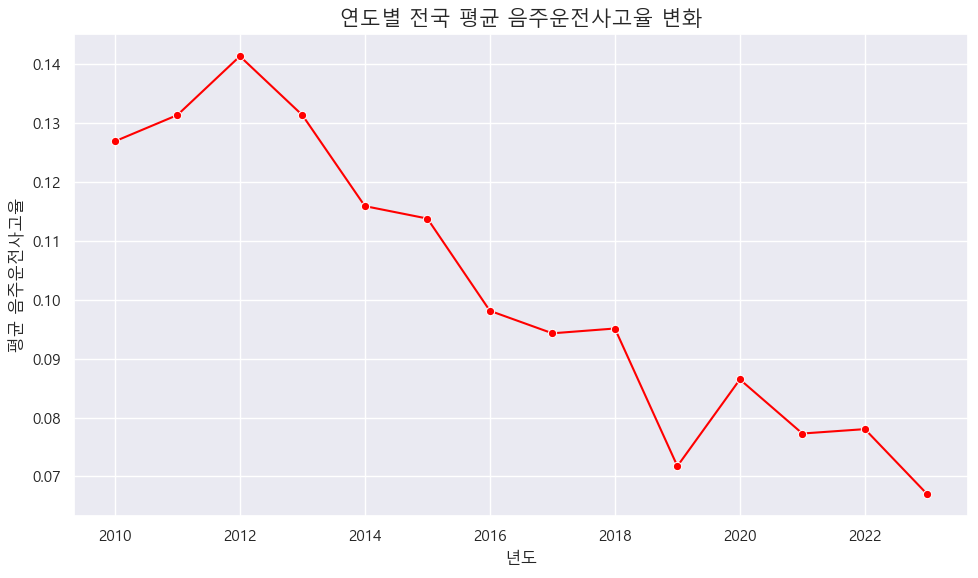

In [203]:
# 데이터 로드
df = pd.read_csv("년도별_행정구역별_음주운전사고율.csv")

# '년도'를 숫자형으로 변환 (혹시 문자열일 경우 대비)
df['년도'] = pd.to_numeric(df['년도'], errors='coerce')

# ▶ 연도별 전국 평균 음주운전사고율 계산
national_mean = df.groupby('년도')['음주운전사고율'].mean().reset_index()

# ▶ 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(data=national_mean, x='년도', y='음주운전사고율', marker='o', color='red')

plt.title('연도별 전국 평균 음주운전사고율 변화', fontsize=15)
plt.xlabel('년도')
plt.ylabel('평균 음주운전사고율')
plt.grid(True)
plt.tight_layout()
plt.show()

- "2012년부터의 음주운전사고율 감소는 도로교통법 개정 및 단속 강화의 결과일 가능성이 높다.
특히 2011년 말 개정된 음주운전 관련 법령과 2012년의 정책적 집중이 연도별 사고율 변화에 영향을 미쳤다고 볼 수 있다."

- 2018~19년의 급감은 윤창호법 효과와 강력한 사회적 압력에 의한 것으로 예상.

- 2020년의 반등은 코로나로 인한 단속 약화 + 행동 변화의 결과일 가능성이 큼. (일제 검문식 음주단속을 중단하고 의심되는 운전자만을 대상으로 선별 단속을 실시하였다.)
- 하지만 코로나 시기에 주류 업소의 통제가 있었기 때문에 야간에 음주 활동이 제한되었던 것을 생각하면 저렇게 까지 늘어난 것은 의문
